In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
df.head()


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

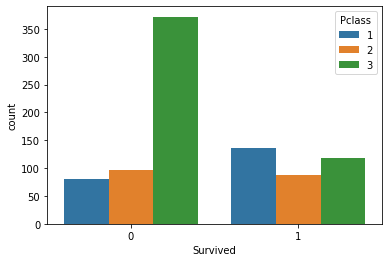

In [6]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

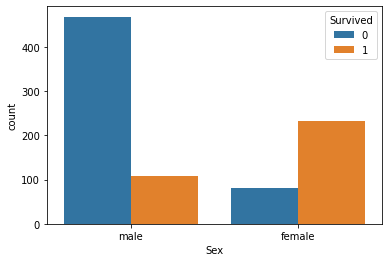

In [7]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [8]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,1,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: xlabel='Sex', ylabel='count'>

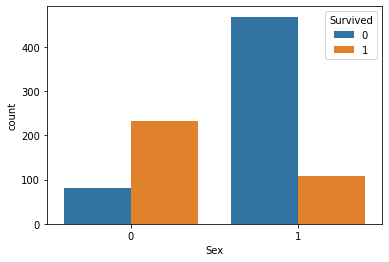

In [10]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [11]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [12]:
df1=df.drop(['Age'],axis=1)

In [13]:
df1.head()

,PassengerId,Name,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,1,0,0,373450,8.0500,NaN,S,0


In [14]:
x=df[['Pclass','Sex']]
y=df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
lr.score(x_train,y_train)

0.7865168539325843

In [25]:
lr.score(x_test,y_test)

0.7877094972067039

In [18]:
pred=print(lr.predict(x_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [19]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [27]:
result=lr.predict([[1,1]])  #input Pclass,Sex
if(result==0):
    print("Not survived")
else:
    print("Survived")

Not survived
